# Datamining Project - Spotify Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Data understanding and preparation

### Dataset Import and simple data visualization

In [2]:
df_train = pd.read_csv('train.csv', skipinitialspace=True)

df_test = pd.read_csv('test.csv', skipinitialspace=True)

## Converting genre from strings to numbers [0,19]

In [29]:
# metto i generi in un array
genres = df_train['genre'].unique()
# creo un dizionario per tenerli associati ad un numero
genres_dict = dict(zip(genres, range(len(genres))))

In [ ]:
# Mappo i generi con i numeri
df_train['genre'] = df_train['genre'].map(genres_dict)
df_test['genre'] = df_test['genre'].map(genres_dict)
print(genres_dict)

In [3]:
df_test.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

In [4]:
df_train

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [5]:
df_train.shape

(15000, 24)

In [6]:
df_train.dtypes

name                      object
duration_ms                int64
explicit                    bool
popularity                 int64
artists                   object
album_name                object
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                     float64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
features_duration_ms       int64
time_signature           float64
n_beats                  float64
n_bars                   float64
popularity_confidence    float64
processing               float64
genre                     object
dtype: object

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [8]:
df_train.describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000
mean,2.468075e+05,27.423667,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647
std,1.279941e+05,18.587534,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616
min,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116
25%,1.800000e+05,14.000000,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953
50%,2.278260e+05,24.000000,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916
75%,2.889030e+05,42.000000,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057
max,4.120258e+06,94.000000,0.980000,1.000000,11.000000,3.156000,1.000000,0.939000,0.996000,1.000000,0.994000,0.995000,220.525000,4.120258e+06,5.000000,7348.000000,2170.00000,1.000000,4.067086


In [9]:
df_mean = df_train.drop(columns=['name', 'explicit', 'artists','mode','popularity_confidence', 'album_name', 'features_duration_ms'], axis=1)
df_mean.groupby(['genre']).mean().T

genre,afrobeat,black-metal,bluegrass,brazil,breakbeat,chicago-house,disney,forro,happy,idm,indian,industrial,iranian,j-dance,j-idol,mandopop,sleep,spanish,study,techno
duration_ms,255761.637333,312680.757333,224340.145333,272329.881333,297002.881333,327283.858667,151753.028000,202532.865333,238628.281333,266994.798667,250070.477333,257821.650667,318245.033333,197655.825333,255980.600000,255450.208000,184629.184000,227925.829333,144137.786667,294924.873333
popularity,25.104000,22.160000,26.738667,43.029333,21.272000,17.185333,25.397333,36.796000,19.032000,12.369333,45.325333,30.352000,4.152000,23.253333,25.892000,42.684000,35.045333,38.032000,22.005333,32.648000
danceability,0.631279,0.298734,0.538100,0.554036,0.655724,0.753515,0.518562,0.632316,0.574681,0.535110,0.566914,0.531588,0.304377,0.669460,0.546007,0.535114,0.210707,0.615171,0.683887,0.665987
energy,0.675015,0.875368,0.537173,0.618380,0.835011,0.736044,0.348533,0.771311,0.907287,0.578247,0.551567,0.864379,0.546381,0.704638,0.856806,0.498937,0.361179,0.705413,0.411714,0.741245
key,5.372000,5.504000,5.438667,5.357333,5.410667,5.736000,4.386667,5.168000,5.769333,5.230667,5.077333,5.520000,5.238667,5.134667,5.097333,5.222667,4.858667,5.362667,5.506667,5.365333
loudness,-8.225705,-6.508709,-9.783220,-7.759363,-6.025184,-8.546865,-13.748233,-5.505208,-5.203780,-11.765193,-9.292241,-5.756509,-12.863459,-6.104521,-3.931972,-8.451313,-23.081637,-6.587379,-10.784156,-7.975337
speechiness,0.079777,0.087969,0.041848,0.094596,0.085956,0.072934,0.084048,0.055037,0.112075,0.076632,0.067434,0.086930,0.089048,0.206154,0.070055,0.039243,0.059597,0.095751,0.097786,0.072713
acousticness,0.274824,0.027036,0.539167,0.334509,0.040624,0.047374,0.690654,0.397581,0.061112,0.353588,0.476783,0.035518,0.404407,0.230750,0.151007,0.473100,0.651964,0.277198,0.521105,0.089616
instrumentalness,0.256546,0.438376,0.132831,0.022967,0.363216,0.421360,0.312890,0.013158,0.217085,0.656057,0.065263,0.218341,0.549633,0.028364,0.030621,0.018452,0.683760,0.016250,0.752711,0.536801
liveness,0.196136,0.243304,0.222549,0.298859,0.210023,0.147124,0.168950,0.294420,0.281472,0.169424,0.183475,0.236005,0.195243,0.184856,0.229913,0.172484,0.344084,0.224091,0.164905,0.168488


### Checking for duplicated records

In [10]:
# Checking for duplicated records

print(df_train.duplicated().sum(), df_test.duplicated().sum())


0 0


In [11]:
# Checking for duplicated songs
print(df_train['name'].duplicated().sum(), df_test['name'].duplicated().sum())

0 0


In [12]:
# Checking differences between duration_ms and features_duration_ms, also there we can notice that most records differ by 1

values = df_train[df_train['duration_ms'] != df_train['features_duration_ms']]
columns_to_print = ['duration_ms', 'features_duration_ms']
values[columns_to_print]

valu = values['features_duration_ms'] - values['duration_ms']

print("Number of different records: ", valu.size)

differences_count = 0
for i in valu:
    if(i != 1 and i != -1):
        differences_count += 1
        
print("Number of different records with a difference greater than 1: ", differences_count)

Number of different records:  5832
Number of different records with a difference greater than 1:  76


### Checking for NaN values

In [13]:
for column in list(df_train.columns):
    containsNaN = df_train[column].isnull().sum()
    if(containsNaN):
        print("Column: " + column + " hasNaN: " + str(containsNaN))

Column: mode hasNaN: 4450
Column: time_signature hasNaN: 2062
Column: popularity_confidence hasNaN: 12783


In [14]:
for column in list(df_test.columns):
    containsNaN = df_test[column].isnull().sum()
    if(containsNaN):
        print("Column: " + column + " hasNaN: " + str(containsNaN))

Column: mode hasNaN: 1461
Column: time_signature hasNaN: 725
Column: popularity_confidence hasNaN: 4279


In [15]:
df_test['popularity_confidence'].isnull().sum()

4279

### Data distribution


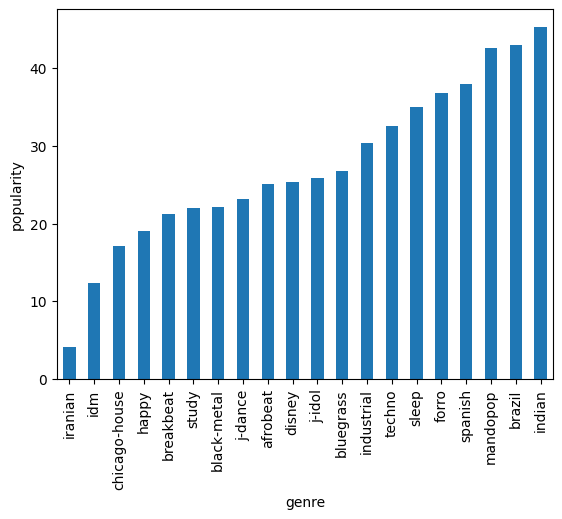

In [16]:
df_train.groupby('genre')['popularity'].mean().sort_values().plot(kind='bar')
plt.ylabel('popularity')
plt.show()

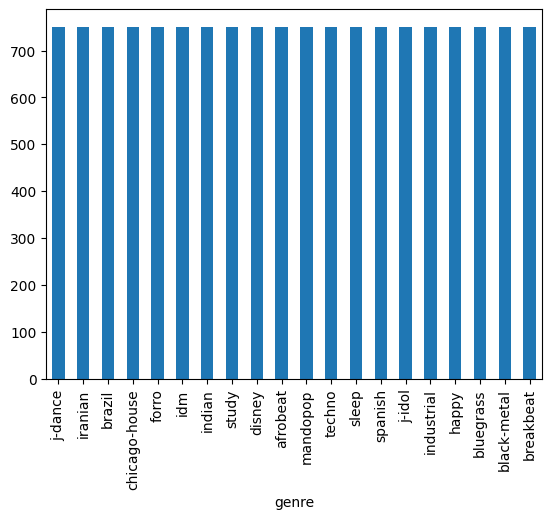

In [17]:
df_train['genre'].value_counts().plot(kind='bar')
plt.show()

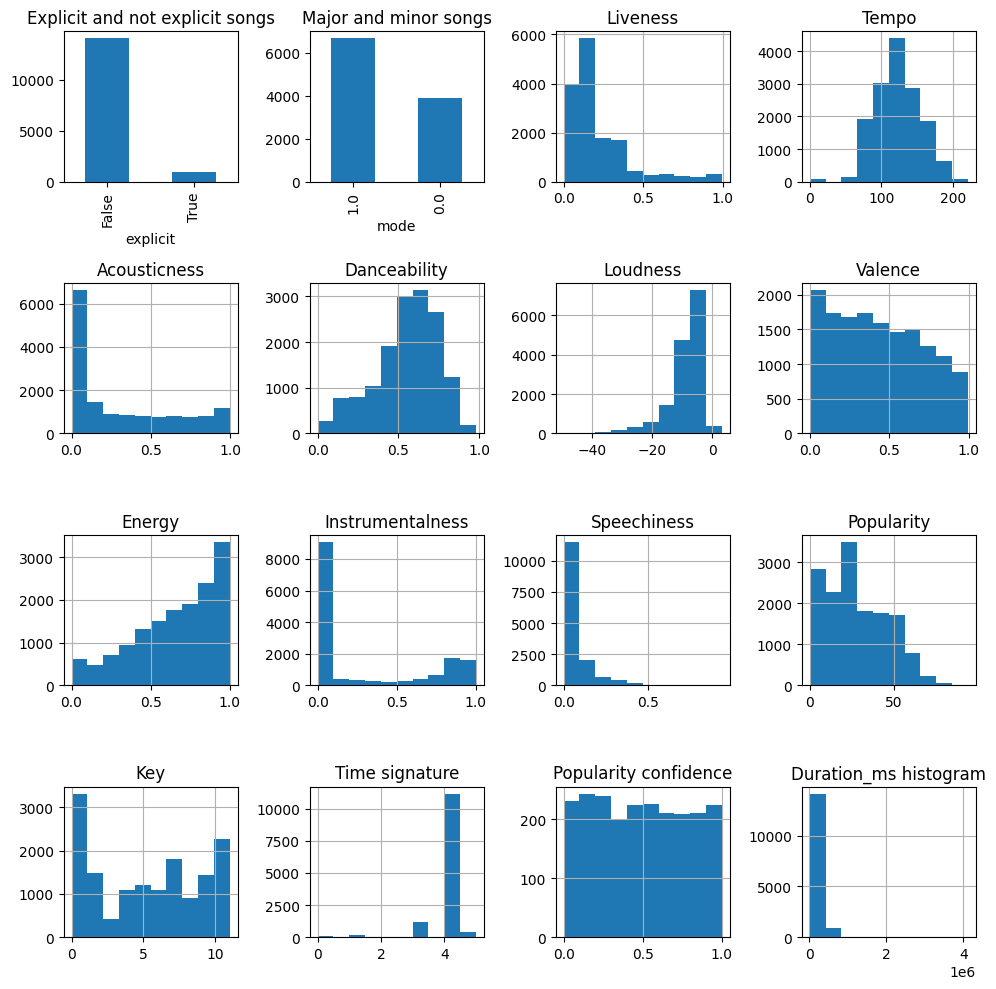

In [18]:
#Plotting the distribution of the features

fig = plt.figure (figsize = (10,10))
fig_dims = (4,4)

plt.subplot2grid(fig_dims, (0,0))
df_train['explicit'].value_counts().plot(kind='bar', title='Explicit and not explicit songs')

plt.subplot2grid(fig_dims, (0,1))
df_train['mode'].value_counts().plot(kind='bar', title='Major and minor songs')

plt.subplot2grid(fig_dims, (1,0))
df_train['acousticness'].hist()
plt.title('Acousticness')

plt.subplot2grid(fig_dims, (1,1))
df_train['danceability'].hist()
plt.title('Danceability')

plt.subplot2grid(fig_dims, (2,0))
df_train['energy'].hist()
plt.title('Energy')

plt.subplot2grid(fig_dims, (2,1))
df_train['instrumentalness'].hist()
plt.title('Instrumentalness')

plt.subplot2grid(fig_dims, (0,2))
df_train['liveness'].hist()
plt.title('Liveness')

plt.subplot2grid(fig_dims, (1,2))
df_train['loudness'].hist()
plt.title('Loudness')

plt.subplot2grid(fig_dims, (2,2))
df_train['speechiness'].hist()
plt.title('Speechiness')

plt.subplot2grid(fig_dims, (0,3))
df_train['tempo'].hist()
plt.title('Tempo')

plt.subplot2grid(fig_dims, (1,3))
df_train['valence'].hist()
plt.title('Valence')

plt.subplot2grid(fig_dims, (2,3))
df_train['popularity'].hist()
plt.title('Popularity')

plt.subplot2grid(fig_dims, (3,0))
df_train['key'].hist()
plt.title('Key')

plt.subplot2grid(fig_dims, (3,1))
df_train['time_signature'].hist()
plt.title('Time signature')

plt.subplot2grid(fig_dims, (3,2))
df_train['popularity_confidence'].hist()
plt.title('Popularity confidence')

plt.subplot2grid(fig_dims, (3,3))
df_train['duration_ms'].hist()
plt.title('Duration_ms histogram')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of beats')

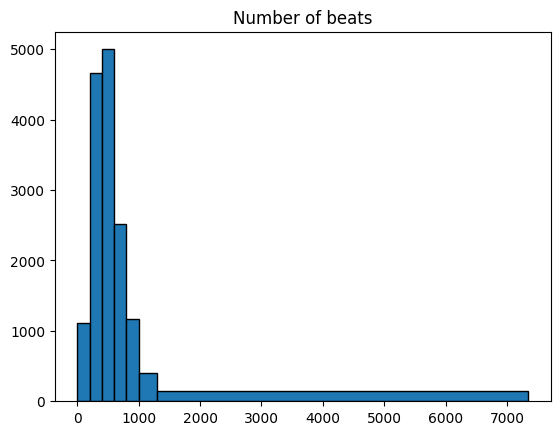

In [19]:
#Plotting the distribution of the n_beats feature
plt.hist(df_train['n_beats'], bins=[0, 200, 400, 600, 800, 1000, 1300, max(df_train['n_beats'])], edgecolor='black')
plt.title('Number of beats')


Text(0.5, 1.0, 'Number of bars')

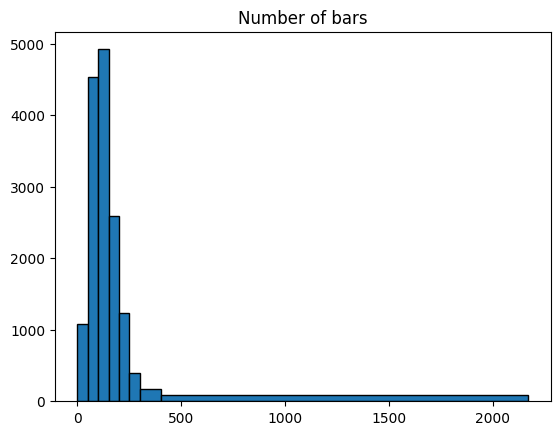

In [20]:
#Plotting the distribution of the n_bars feature
plt.hist(df_train['n_bars'], bins=[0,50, 100,150, 200, 250,300,400, max(df_train['n_bars'])], edgecolor='black')
plt.title('Number of bars')

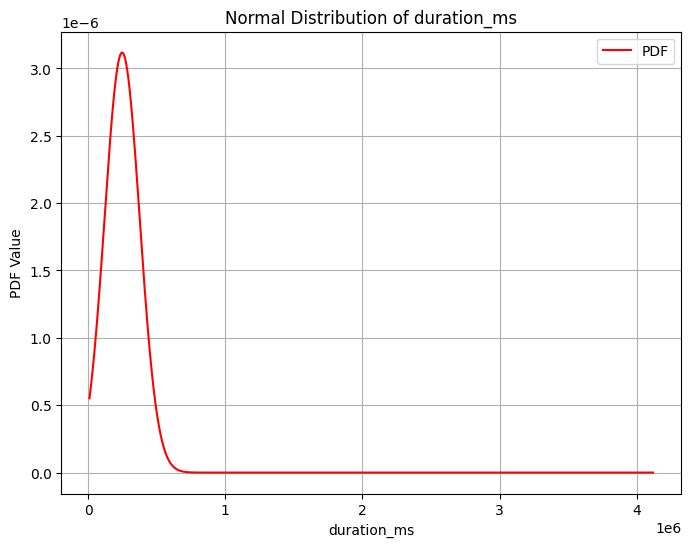

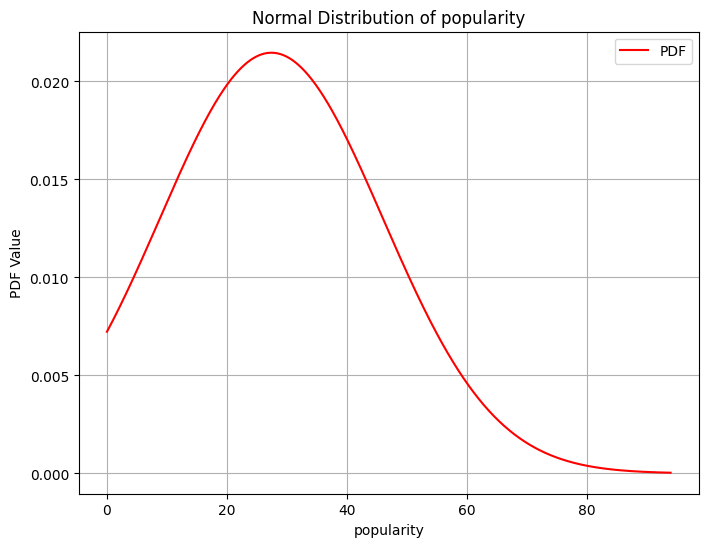

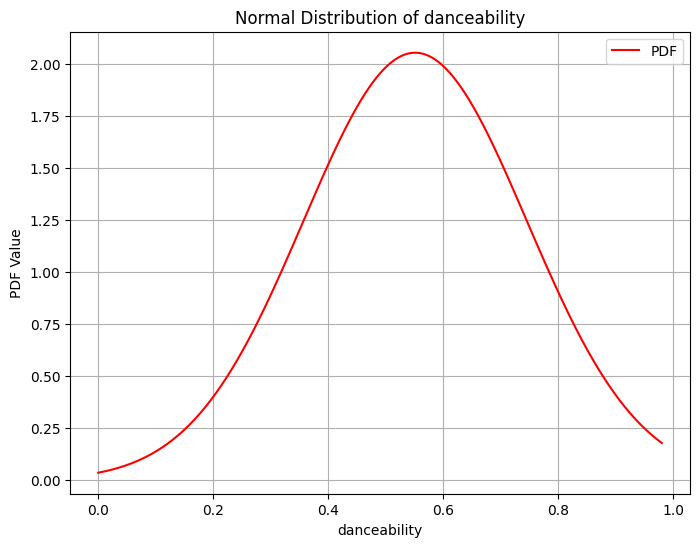

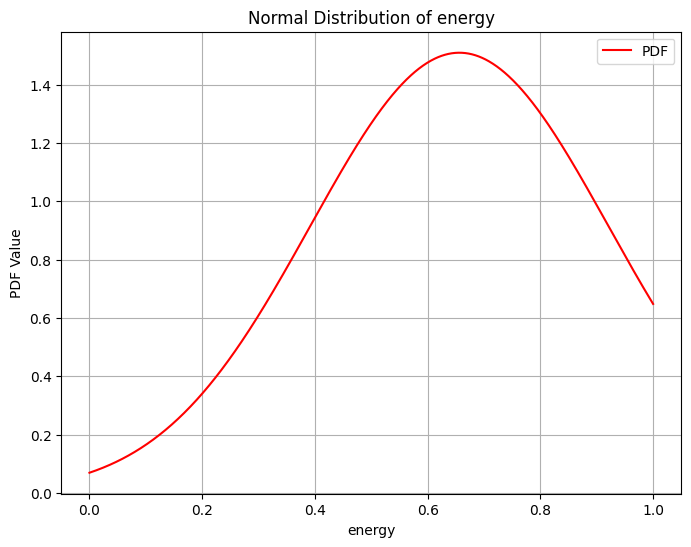

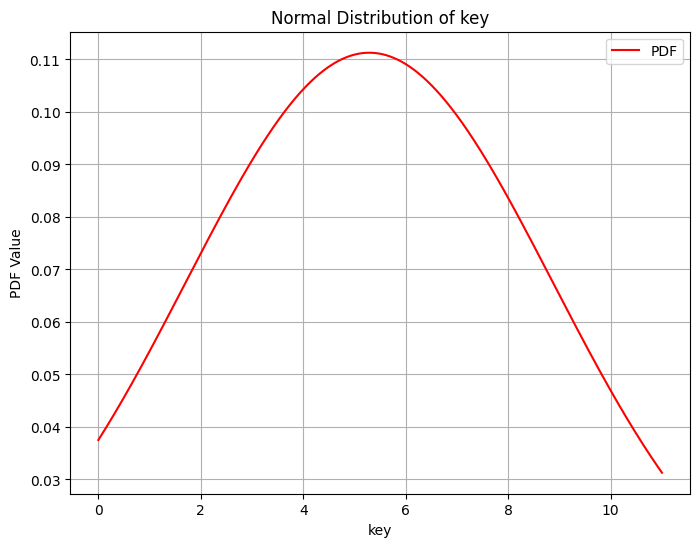

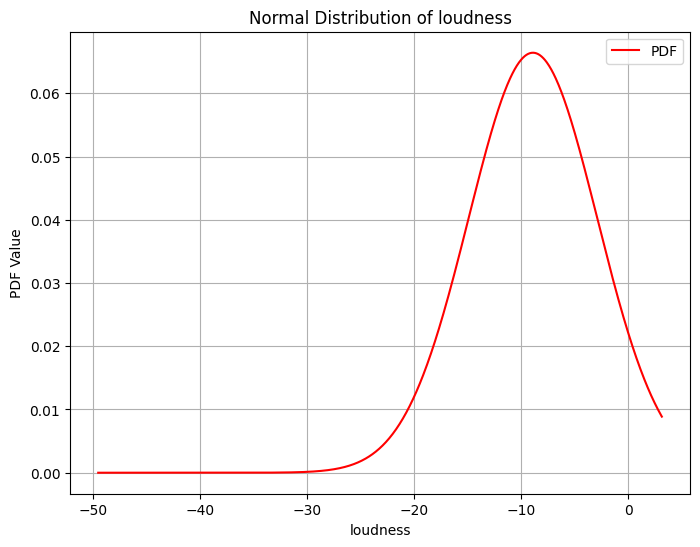

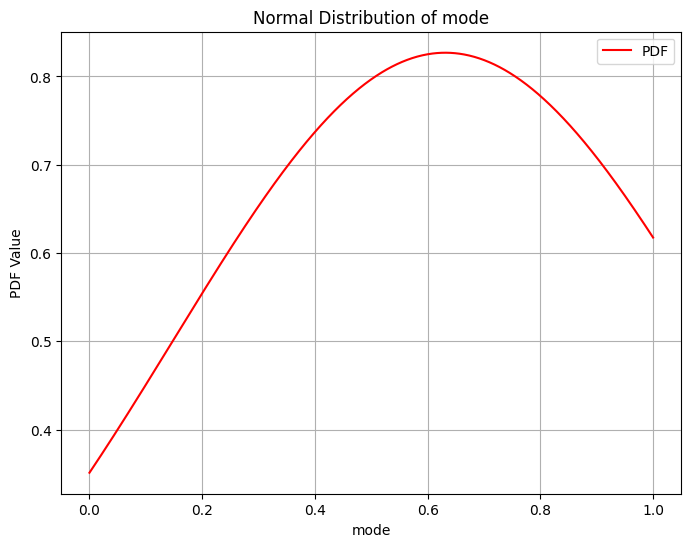

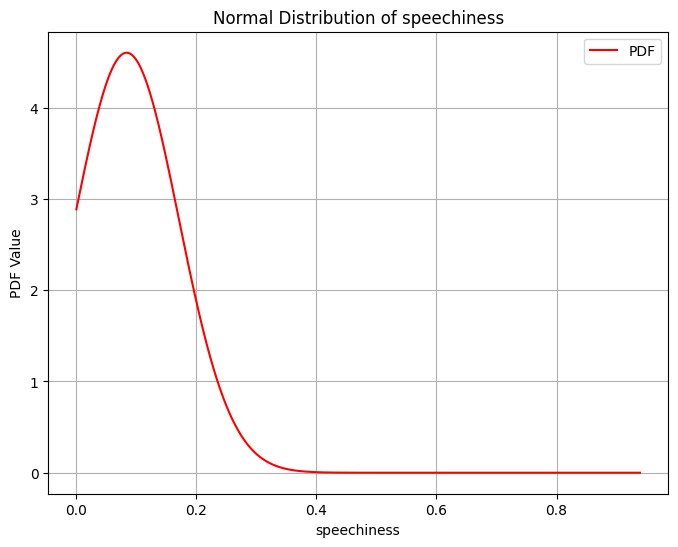

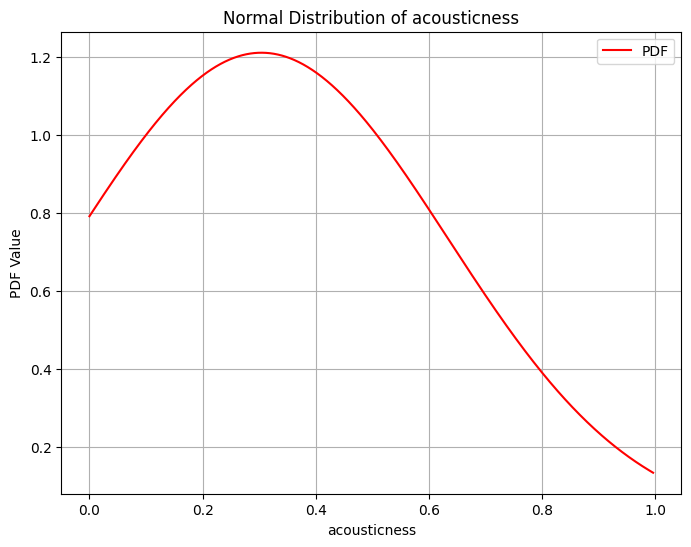

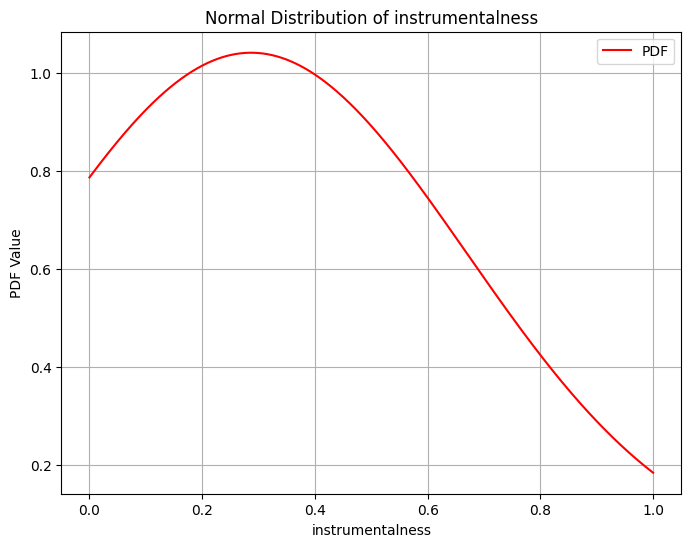

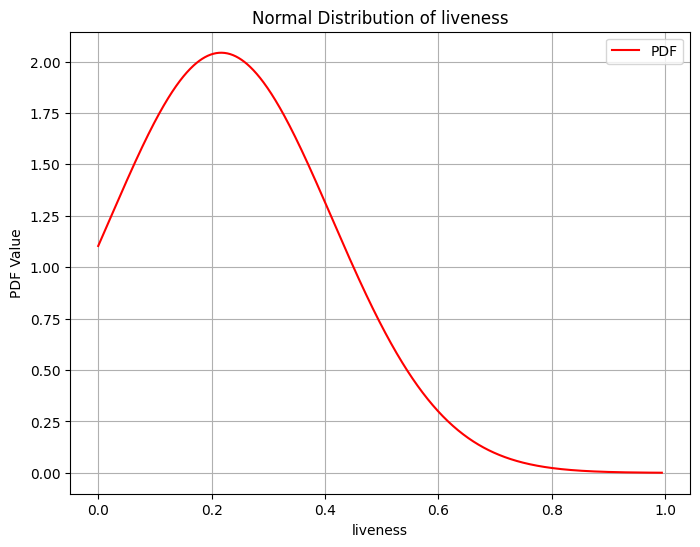

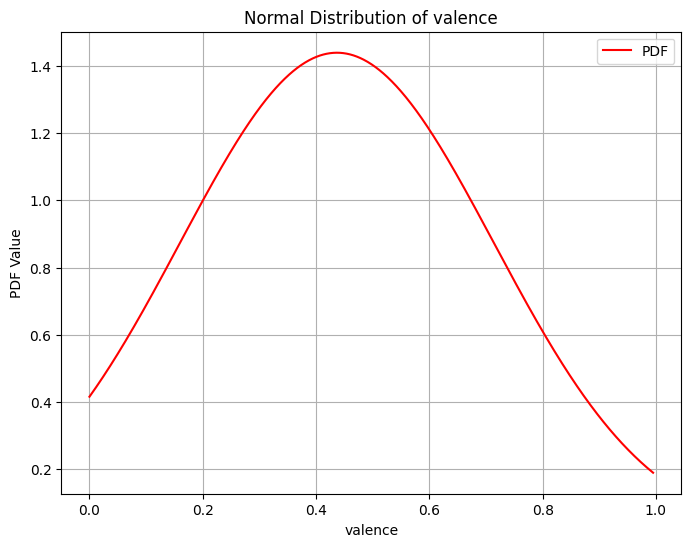

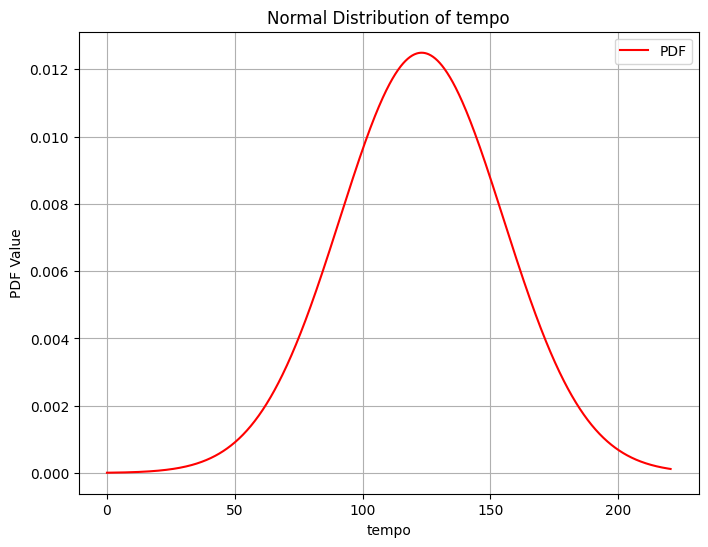

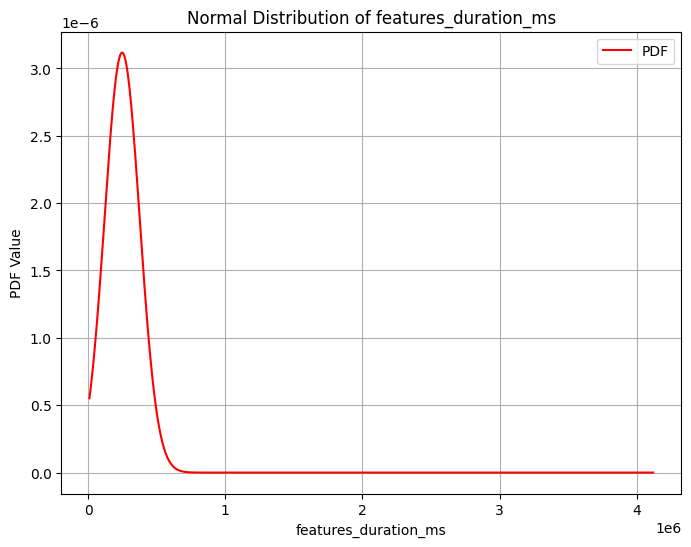

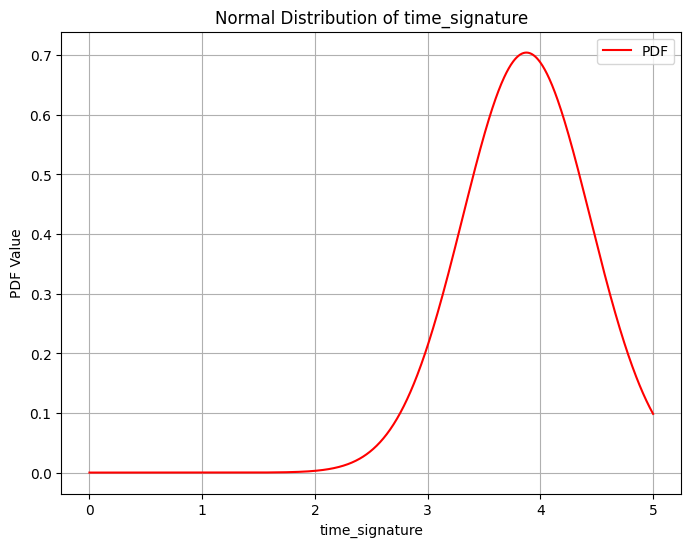

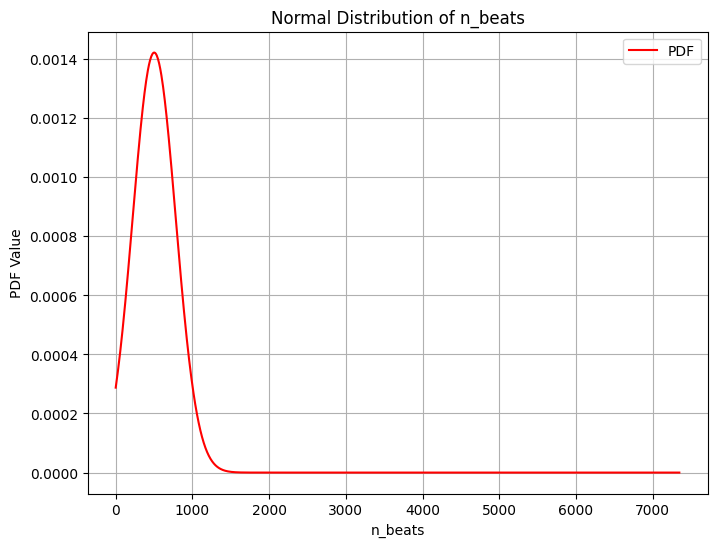

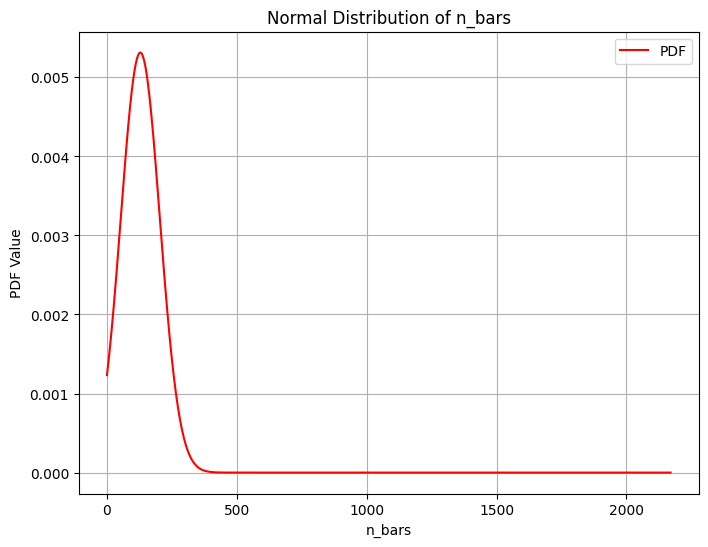

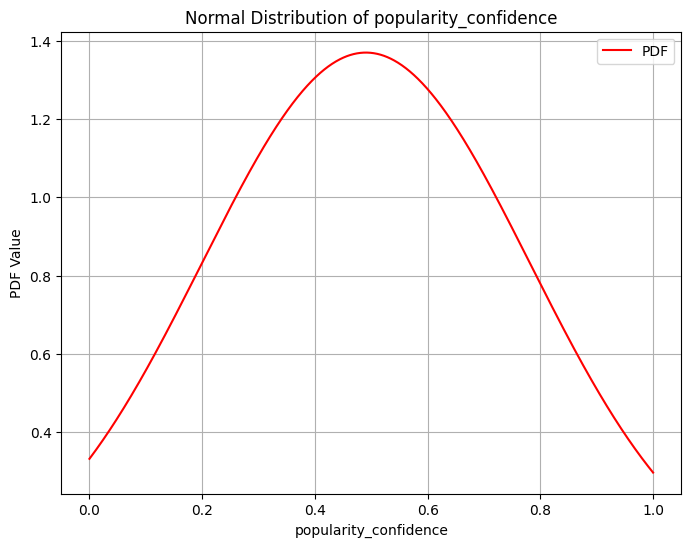

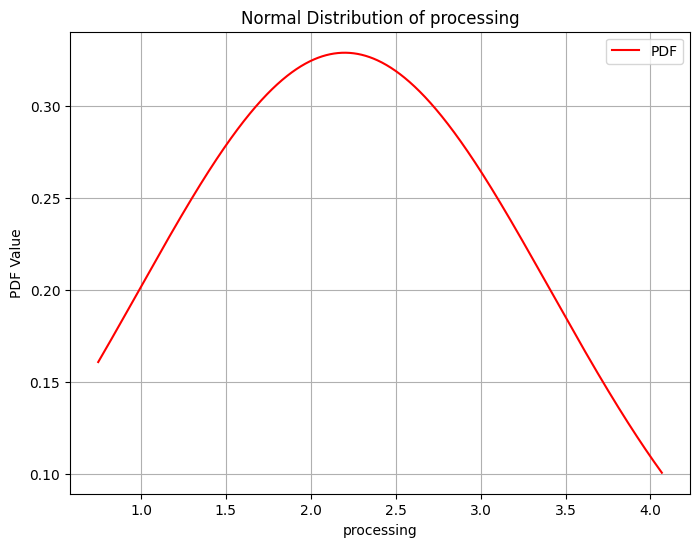

In [21]:
#Normal distribution of numerical values
from scipy.stats import norm

for attribute in list(df_train.columns):
    if(df_train[attribute].dtype == np.float64 or df_train[attribute].dtype == np.int64):
        x = np.linspace(df_train[attribute].min(), df_train[attribute].max(), 1000)

        mu = df_train[attribute].mean()
        sigma = df_train[attribute].std()

        # Calculate the PDF
        pdf = norm.pdf(x, loc=mu, scale=sigma)

        plt.figure(figsize=(8, 6))
        plt.plot(x, pdf, 'r', label='PDF')
        plt.xlabel(attribute)
        plt.ylabel('PDF Value')
        plt.title('Normal Distribution of ' + attribute)
        plt.legend()
        plt.grid()
        plt.show()

### Genre splitting and analysis

In [22]:
len(list(df_train['genre'].unique()))

20

In [23]:
genresData = []
for genre in df_train['genre'].unique():
    genresData.append(df_train[df_train['genre'] == genre])
    
genresData[0].describe()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,532.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,639.000000,750.000000,750.000000,102.000000,750.000000
mean,197655.825333,23.253333,0.669460,0.704638,5.134667,-6.104521,0.541353,0.206154,0.230750,0.028364,0.184856,0.574876,116.152327,197656.249333,4.067293,378.593333,95.770667,0.458902,2.171025
std,48780.756946,16.338781,0.127982,0.151764,3.631453,2.495812,0.498756,0.136534,0.221923,0.139179,0.134258,0.216221,30.821687,48780.753023,0.571127,145.336573,37.379956,0.283461,1.161046
min,44826.000000,0.000000,0.256000,0.082600,0.000000,-18.982000,0.000000,0.024300,0.000019,0.000000,0.027800,0.034600,50.680000,44827.000000,1.000000,75.000000,18.000000,0.006000,0.748116
25%,169740.750000,14.000000,0.585250,0.604000,1.000000,-7.462500,0.000000,0.077925,0.050000,0.000000,0.093625,0.404000,96.032750,169741.500000,4.000000,281.250000,71.000000,0.211250,1.170953
50%,190993.500000,22.000000,0.675500,0.719500,5.000000,-5.743500,1.000000,0.198000,0.155000,0.000000,0.132500,0.593000,105.986000,190993.500000,4.000000,340.000000,86.000000,0.480500,2.367412
75%,216231.500000,31.000000,0.757000,0.820750,8.000000,-4.437250,1.000000,0.309000,0.349500,0.000004,0.250000,0.742750,132.017250,216232.250000,4.000000,449.750000,113.000000,0.679250,3.349057
max,605100.000000,80.000000,0.958000,0.993000,11.000000,-0.308000,1.000000,0.861000,0.995000,0.930000,0.898000,0.978000,212.276000,605100.000000,5.000000,1164.000000,352.000000,0.990000,4.067086


In [24]:
import pandas as pd
from scipy.stats import pearsonr

# Initialize empty lists to store information
genre_list = []
feature_1_list = []
feature_2_list = []
correlation_list = []

for genre_df in genresData:
    # Drop NaN values and unwanted columns
    genre_df = genre_df.dropna(axis=1)
    genre_df = genre_df.drop(columns=['name', 'explicit', 'artists', 'album_name', 'features_duration_ms'], axis=1)
    genre = genre_df.iloc[0]['genre']
    
    for feature_1 in list(genre_df.columns):
        if feature_1 != 'genre':
            for feature_2 in list(genre_df.columns):
                if feature_2 != 'genre' and feature_1 != feature_2:
                    corr, p_val = pearsonr(genre_df[feature_1], genre_df[feature_2])
                    if abs(corr) > 0.7:  # Filter based on correlation threshold
                        if not feature_1 in feature_2_list or not feature_2 in feature_1_list:
                            genre_list.append(genre)
                            feature_1_list.append(feature_1)
                            feature_2_list.append(feature_2)
                            correlation_list.append(corr)

# Create a DataFrame from the lists
correlation_df = pd.DataFrame({
    'genre': genre_list,
    'feature_1': feature_1_list,
    'feature_2': feature_2_list,
    'correlation': correlation_list
})

correlation_df


,genre,feature_1,feature_2,correlation
0,j-dance,duration_ms,n_beats,0.713244
1,j-dance,duration_ms,n_bars,0.702246
2,j-dance,energy,loudness,0.728585
3,j-dance,tempo,n_beats,0.718506
4,j-dance,n_beats,n_bars,0.983720
...,...,...,...,...
65,brazil,duration_ms,n_bars,0.841819
66,brazil,n_beats,n_bars,0.989368
67,breakbeat,duration_ms,n_beats,0.940839
68,breakbeat,duration_ms,n_bars,0.940596


In [25]:
features_list = list(set(feature_1_list)) + list(set(feature_2_list))
features_list

['energy',
 'duration_ms',
 'loudness',
 'tempo',
 'n_beats',
 'danceability',
 'acousticness',
 'valence',
 'loudness',
 'n_beats',
 'n_bars']

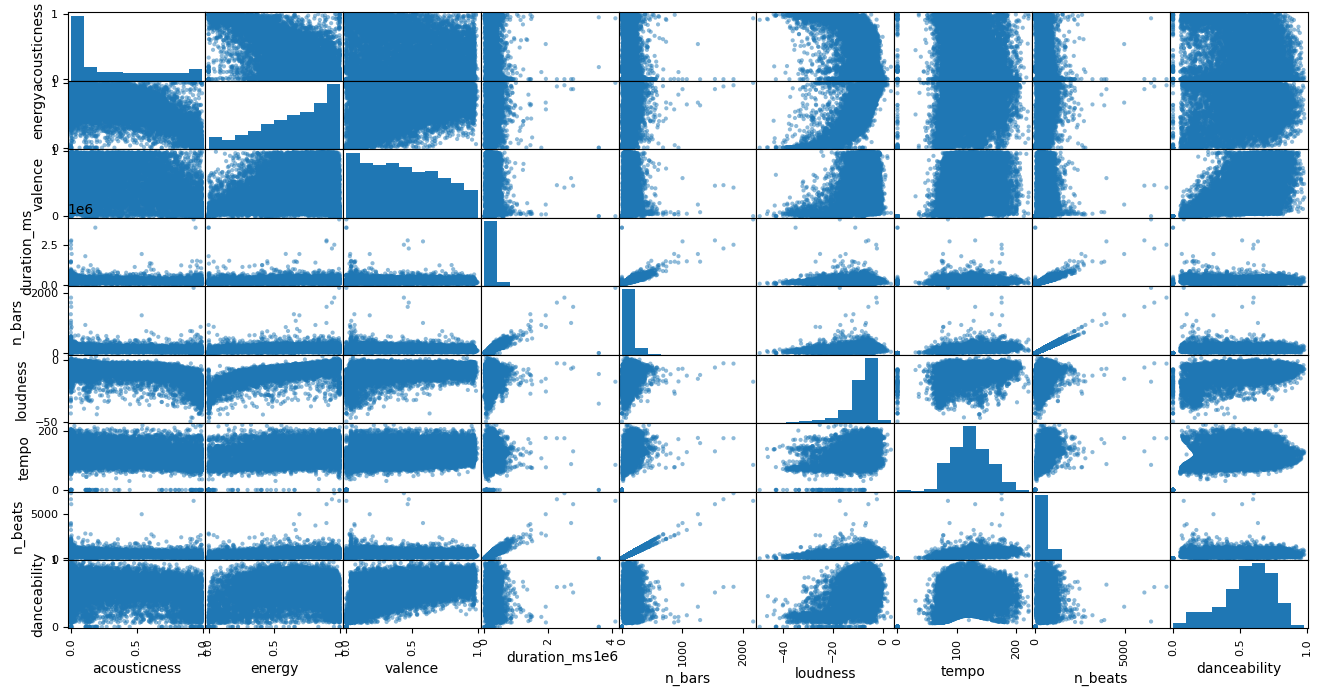

In [26]:

df_scatter_matrix = df_train.drop(columns=['name', 'artists', 'genre', 'explicit','album_name'])

    
    
pd.plotting.scatter_matrix(df_scatter_matrix[list(set(features_list))], figsize=(16, 8))
plt.show()



### Data correlation

Text(0.5, 1.0, 'Scatter plot of duration_ms and feature_duration_ms')

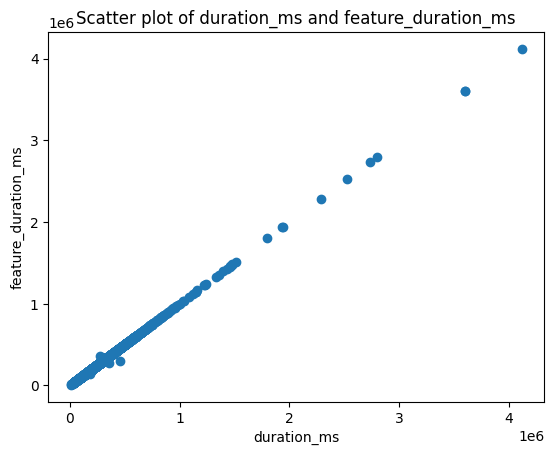

In [27]:
##Scatter plot of 'duration_ms' and 'feature_duration_ms'
plt.scatter(df_train['duration_ms'], df_train['features_duration_ms'])
plt.xlabel('duration_ms')
plt.ylabel('feature_duration_ms')
plt.title('Scatter plot of duration_ms and feature_duration_ms')

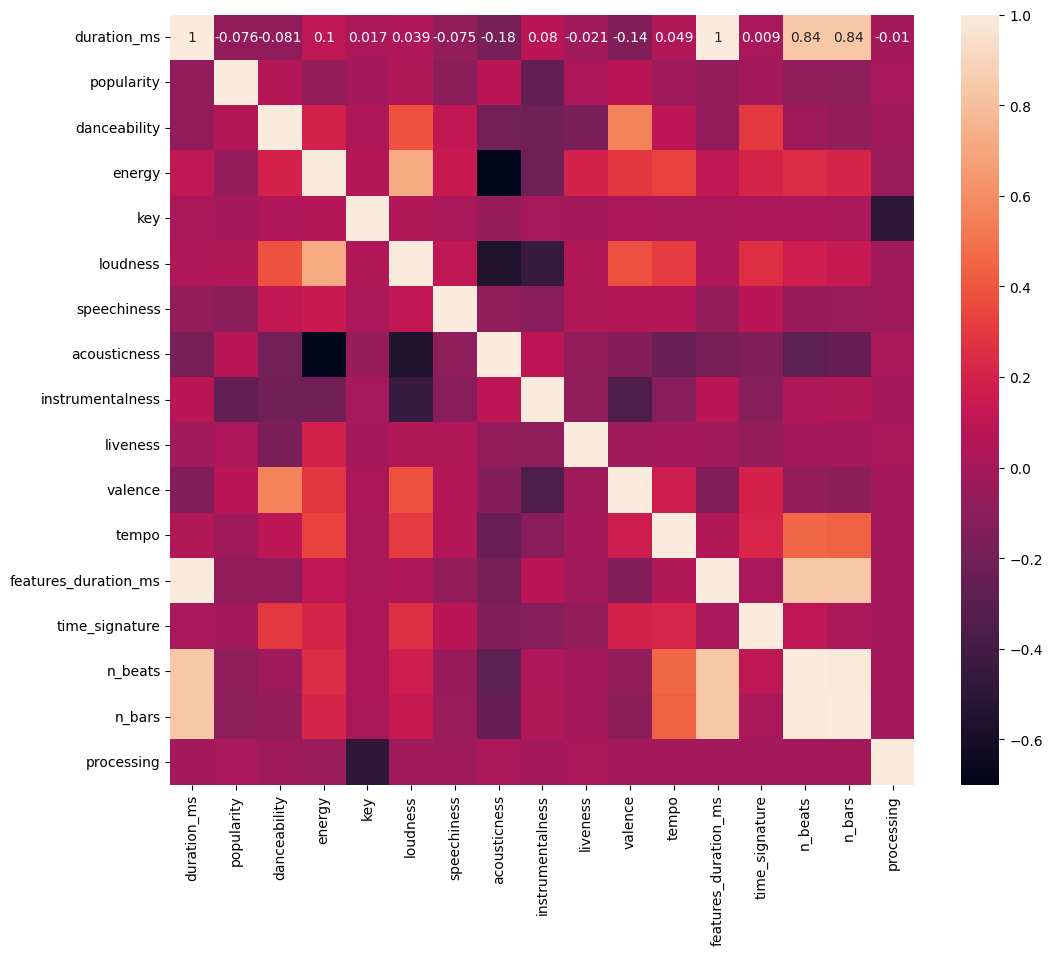

In [28]:
#Pearson correlation heatmap
import seaborn as sns
df_mean = df_train.drop(columns=['name', 'explicit', 'artists','mode','popularity_confidence', 'album_name', 'genre'], axis=1)

# Compute the correlation matrix and make it larger
plt.figure(figsize=(12, 10))
corr = df_mean.corr()
sns.heatmap(corr, annot=True)
plt.show()